<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-e727555865e1>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Is there a significant difference in the median value of homes bordered by the Charles River?

Target: MEDV and CHAS. Method: Boxplot to show the outcomes
- **H₀** : There's no significative difference between median value of homes bordered by Charles' River and those not bordered.
- **H₁** : There's significative difference between median value of homes bordered by Charles' River and those not bordered.

**Average value of owner-occupied homes** *(boxplot)*

<ipython-input-38-54218b5857eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure_1 = sns.boxplot(y='MEDV', data= boston_df, palette="deep", legend=False)


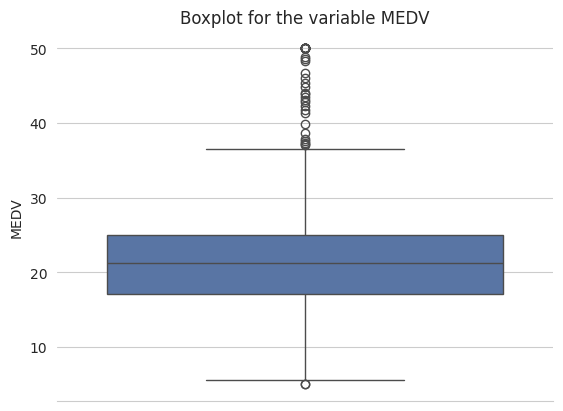

In [38]:
# Set graphic style
sns.set_style("whitegrid")

# Create boxplot
figure_1 = sns.boxplot(y='MEDV', data= boston_df, palette="deep", legend=False)

# Delete spine graphic
sns.despine(left=True)

# Add a title to the graphic
pyplot.title('Boxplot for the variable MEDV')

# Show the graphic
pyplot.show()

**Bar chart for the Charles River variable.**

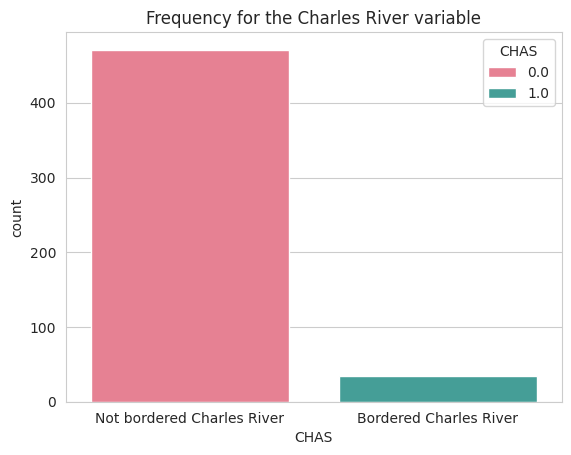

In [34]:
# Create bar chart with frequency of CHAS variable
figure_2 = sns.countplot(x = 'CHAS', data=boston_df, hue='CHAS', palette='husl')
# Add a title to the graphic
pyplot.title('Frequency for the Charles River variable')
# Modify labels in x variable
figure_2.set_xticks([0, 1])
figure_2.set_xticklabels(['Not bordered Charles River', 'Bordered Charles River'])
# Show the chart
pyplot.show()

**Normality test using Shapiro-Wilk**

In [11]:
from scipy.stats import shapiro

# Extract MEDV column
medv_data = boston_df['MEDV']

# Calculate mean and standar deviation
media = np.mean(medv_data)
desviacion_estandar = np.std(medv_data)

# Make Shapiro-Wilk normality test
stat, p_value = shapiro(medv_data)

# Show the outcomes
print(f'Mean: {media}')
print(f'Standar deviation: {desviacion_estandar}')
print(f'Statistic Test: {stat}')
print(f'p Value: {p_value}')

Media: 22.532806324110677
Desviación Estándar: 9.188011545278203
Estadístico de prueba: 0.9171758803890093
Valor p: 4.941386258635722e-16


Since the p-value of the normality test is relatively low and the test statistic *0.91...* is less than the critical **Wc**: 0.95, the **Mann-Whitney U Test** will be used. If your data does not meet the assumptions of normality, this non-parametric test is a good alternative to compare the medians of two independent groups. 

**Boxplot for the variable CHAS using MEDV like a dependent variable**

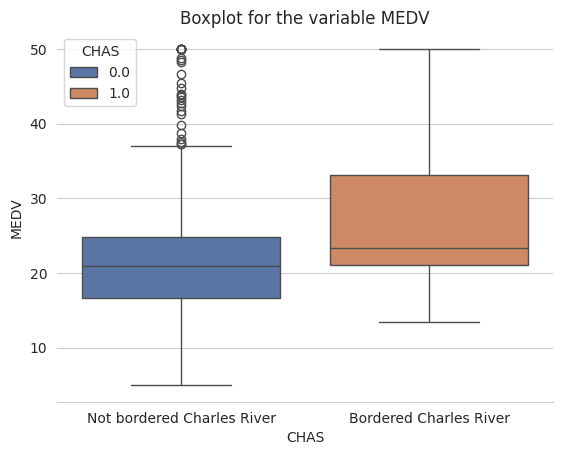

In [36]:
# Set graphic style
sns.set_style("whitegrid")

# Create boxplot
figure_3 = sns.boxplot(x = 'CHAS', y='MEDV', data= boston_df, palette="deep", hue='CHAS')

# Delete spine graphic
sns.despine(left=True)

# Add a title to the graphic
pyplot.title('Boxplot for the variable MEDV')

figure_3.set_xticks([0, 1])
figure_3.set_xticklabels(['Not bordered Charles River', 'Bordered Charles River'])

# Show the graphic
pyplot.show()

Double-click **here** to show another way to graph
<!--
# Filter the group where CHAS is 0.0
grupo_chas_0 = boston_df.loc[boston_df['CHAS'] == 0.0, ['CHAS', 'MEDV']]

# Filter the group where CHAS is 1.0
grupo_chas_1 = boston_df.loc[boston_df['CHAS'] == 1.0, ['CHAS', 'MEDV']]

# Crear una figura y un conjunto de subgráficos
fig, ax = pyplot.subplots()

# Crear el diagrama de cajas para el grupo donde CHAS es 0.0
ax.boxplot(grupo_chas_0['MEDV'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Crear el diagrama de cajas para el grupo donde CHAS es 1.0
ax.boxplot(grupo_chas_1['MEDV'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightgreen"))

# Configurar las etiquetas de los ejes
ax.set_xticks([1, 2])
ax.set_xticklabels(['Not border Charles River', 'Border Charles River'])
ax.set_ylabel('MEDV')

# Mostrar la figura
pyplot.title('Diagrama de Cajas de MEDV según el CHAS')
pyplot.show()
-->

**Using statistic testaccording to the normality test carried out previously**

In [8]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(grupo_chas_0['MEDV'], grupo_chas_1['MEDV'])

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 5605.5
Valor p: 0.0015816705011294974


### Conclusion

- To be in agreement with Mann-Whitney U test and value p<0.05 reject the H0 and accept H1 because it exist a diference significative in the mean value in dollar for those house in bordered Charles River with those not. 
- Those house are bordered Charles River zone have a mean value in miles of dollars more than not ones. However, exist several atipic datas on the side group, these datas represent values over 35 MEDV for these houses. 

## Is there any difference in the average values of homes for each proportion of owner-occupied units built before 1940? 

TARGET: ANOVA, boxplot and create 3 groups <35 | 35-70 | >70
- **H₀** : There's no significative difference between median value of homes bordered by AGE.
- **H₁** : There's significative difference between median value of homes bordered by AGE.

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger property'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years property'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 and older property'

In [13]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger property']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years property']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 and older property']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [16]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger property']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years property']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older property']['MEDV']

In [17]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**The variable MEDV versus the variable AGE.** *(boxplot)*

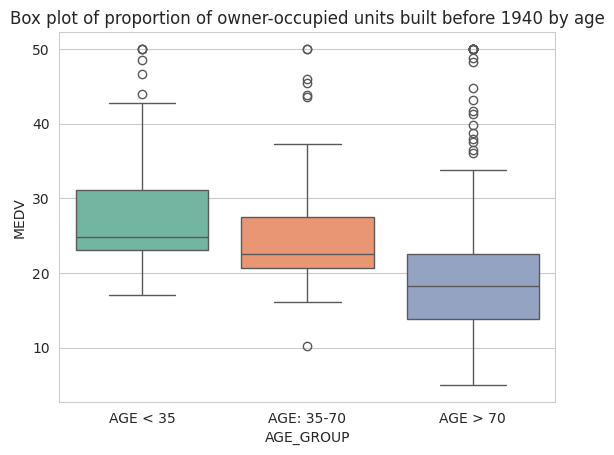

In [47]:
# Create a new category column to classify age's groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['AGE < 35', 'AGE: 35-70', 'AGE > 70'])

# Create boxplot using Seaborn
sns.set_style("whitegrid")
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, hue='AGE_GROUP', palette='Set2')

# Add graphic title
pyplot.title('Box plot of proportion of owner-occupied units built before 1940 by age')

# Show the graphic
pyplot.show()

Double-click **here** to show another way to create the graph

<!-- 
# Crear una figura y un conjunto de subgráficos
fig, ax = pyplot.subplots()

# Crear el diagrama de cajas para el grupo donde AGE es menor a 35
ax.boxplot(thirtyfive_lower, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor="green"))

# Crear el diagrama de cajas para el grupo donde AGE está entre 35 y 70
ax.boxplot(thirtyfive_seventy, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor="orange"))

# Crear el diagrama de cajas para el grupo donde AGE está entre 35 y 70
ax.boxplot(seventy_older, positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor="blue"))

# Configurar las etiquetas de los ejes
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['AGE < 35', 'AGE: 35-70', 'AGE > 70'])
ax.set_ylabel('MEDV')

# Mostrar la figura
pyplot.title('Diagrama de Cajas de propietarios según AGE')
pyplot.show()
-->

## Conclusion

- The Levene's test did not find evidence that the variances of the groups are different (p>0.05), allowing me to use the ANOVA test.
- The ANOVA test found a significant difference between the means of the groups, meaning that age does have an impact on the average values of homeowners. 

## Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail commercial acres per city? 

TARGET: INDUX and NOX, scatter plot, Pearson correlation
- H₀ : NOX is not correlated with INDUX.
- H₁ : NOX is correlated with INDUX.

**A scatter plot to show the relationship between nitric oxide concentrations and the proportion of non-retail commercial acres per city.**

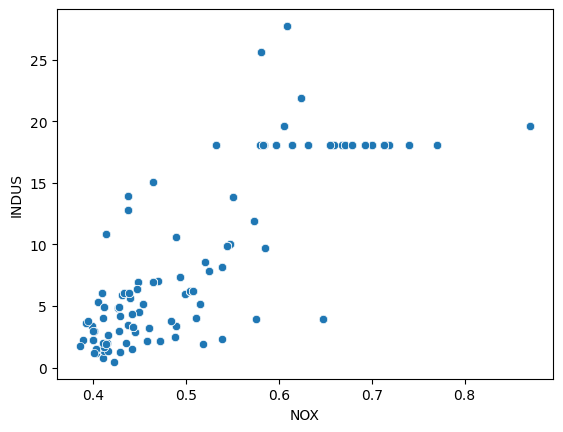

In [22]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

**Statistic of Pearson correlation**

In [24]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### Conclusion: 

Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between INDUS and NOX.

## What is the impact of an additional weighted distance to the five employment centers of Boston on the median value of owner-occupied housing?

TARGET: DIS and MEDV, regression analysis

**Using OLS Regression Model**

In [26]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        16:07:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:

- Since p < 0.05 there is evidence of correlation between DIS and MEDV. Therefore, the null hypothesis that there is no relationship between DIS and MEDV is rejected. This suggests that DIS has a significant impact on MEDV.

- The R-squared value of 0.062 indicates that approximately 6.2% of the variability in MEDV can be explained by DIS. Although this shows that there is a relationship, the value is relatively low, suggesting that DIS is not a strong predictor of MEDV on its own.

- **Magnitude of the Effect**: the DIS coefficient of 1.0916 indicates that if there was an increase in DIS it would be associated with an increase in MEDV, although there may be other options for predictor variables that have a greater impact and a greater correlation for the modeling.

**Histogram for the variable student-to-teacher ratio** (PTRATIO)

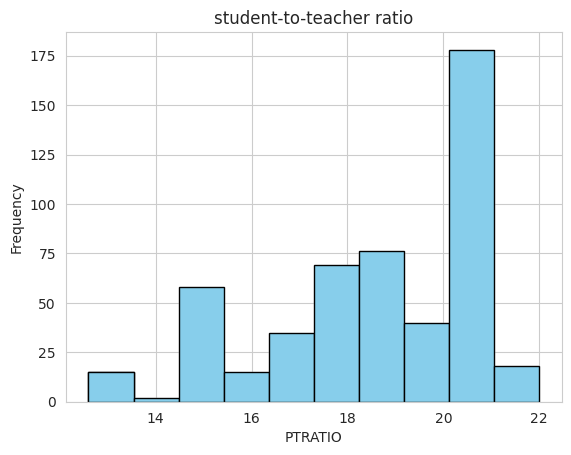

In [59]:
# Create the histogram with PTRATIO variable
figure_5 = pyplot.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

# Add a title to the plot
pyplot.title('student-to-teacher ratio')

# Add labels to exes x and y
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()

## Author

Brayan Samboní